In [22]:
from google.colab import drive

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder

In [2]:
drive.mount("/content/drive")
ratings_path = "/content/drive/MyDrive/Colab Notebooks/Elevvo Internship/Movie Recommendation System/ml-100k/u.data"
movies_path = "/content/drive/MyDrive/Colab Notebooks/Elevvo Internship/Movie Recommendation System/ml-100k/u.item"
users_path = "/content/drive/MyDrive/Colab Notebooks/Elevvo Internship/Movie Recommendation System/ml-100k/u.user"

ratings_cols = ["user_id", "movie_id", "rating", "timestamp"]
movies_cols = ["movie_id", "title", "release_date", "video_release_date",
               "IMDb_URL", "unknown", "Action", "Adventure", "Animation",
               "Children", "Comedy", "Crime", "Documentary", "Drama", "Fantasy",
               "Film-Noir", "Horror", "Musical", "Mystery", "Romance", "Sci-Fi",
               "Thriller", "War", "Western"]
users_cols = ["user_id", "age", "gender", "occupation", "zip_code"]

ratings = pd.read_csv(ratings_path, sep="\t", names=ratings_cols)
movies = pd.read_csv(movies_path, sep="|", names=movies_cols, encoding="latin-1")
users = pd.read_csv(users_path, sep="|", names=users_cols)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
ratings.drop("timestamp", axis=1, inplace=True)
movies.drop("video_release_date", axis=1, inplace=True)
movies.drop("unknown", axis=1, inplace=True)
movies.drop("IMDb_URL", axis=1, inplace=True)
movies.drop(266, inplace=True)
movies.drop(1371, inplace=True)
users.drop("zip_code", axis=1, inplace=True)

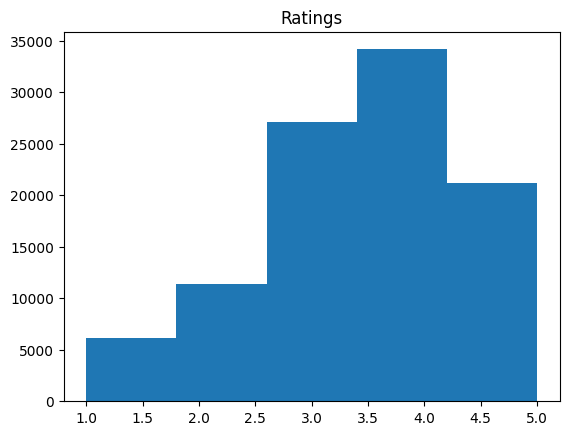

In [9]:
plt.hist(ratings["rating"], bins = 5)
plt.title("Ratings");

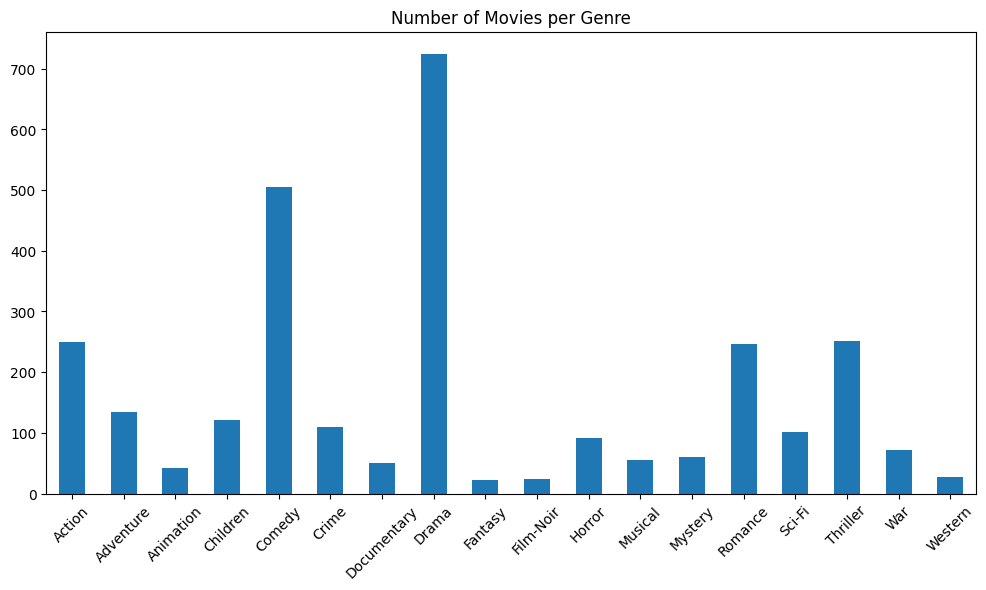

In [8]:
genres = movies.columns[3:]

plt.figure(figsize=(12, 6))
movies[genres].sum().plot(kind="bar")

plt.title("Number of Movies per Genre")
plt.xticks(rotation=45);

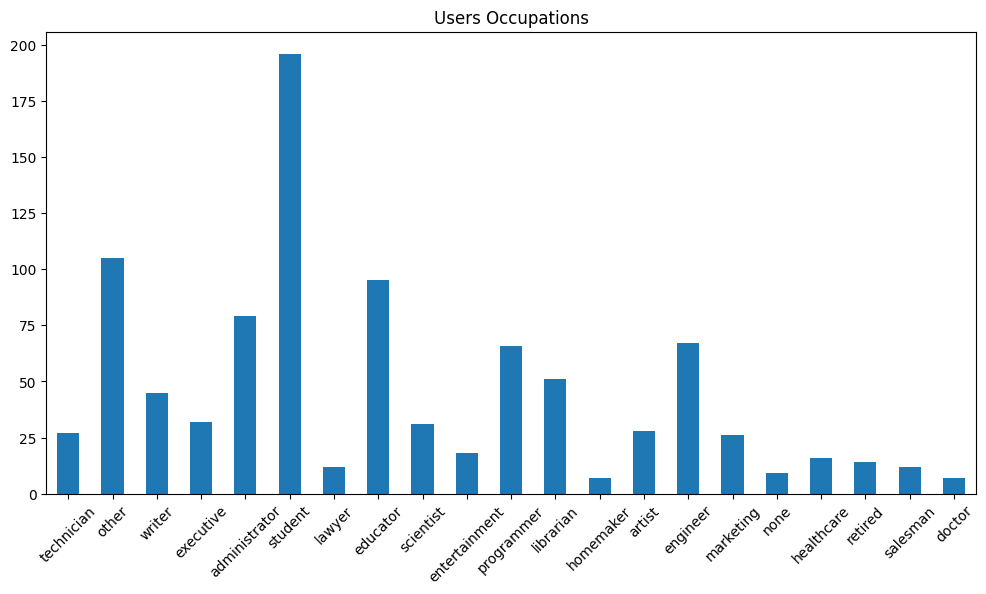

In [21]:
plt.figure(figsize=(12, 6))
users["occupation"].value_counts(sort=False).plot(kind="bar", xlabel="")

plt.title("Users Occupations")
plt.xticks(rotation=45);

In [11]:
movie_ratings = pd.merge(ratings, movies, on="movie_id")

full_data = pd.merge(movie_ratings, users, on="user_id")

full_data.head()

,user_id,movie_id,rating,title,release_date,Action,Adventure,Animation,Children,Comedy,...,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,age,gender,occupation
0,196,242,3,Kolya (1996),24-Jan-1997,0,0,0,0,1,...,0,0,0,0,0,0,0,49,M,writer
1,186,302,3,L.A. Confidential (1997),01-Jan-1997,0,0,0,0,0,...,0,1,0,0,1,0,0,39,F,executive
2,22,377,1,Heavyweights (1994),01-Jan-1994,0,0,0,1,1,...,0,0,0,0,0,0,0,25,M,writer
3,244,51,2,Legends of the Fall (1994),01-Jan-1994,0,0,0,0,0,...,0,0,1,0,0,1,1,28,M,technician
4,166,346,1,Jackie Brown (1997),01-Jan-1997,0,0,0,0,0,...,0,0,0,0,0,0,0,47,M,educator
